In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates

%matplotlib notebook

In [33]:
folder = 'intralipid_mixer_sweep_bkandfwd'
df = pd.HDFStore('../Data/' + folder + '/analysis.h5')['df']
# Create column for time since start of measurement
# df['datetime'] = df['datetime'].astype('datetime64[ns]')
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

In [34]:
# Get some useful data for plotting later
try:
    flush_time = df['run_time'][0]
    print(flush_time)
except KeyError:
    print('Not valid entry')

5


In [35]:
# df.head()
# df.info()

<IPython.core.display.Javascript object>


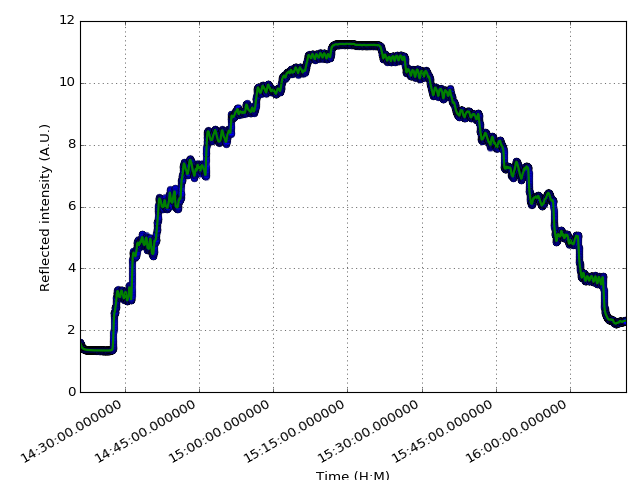

In [36]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot('datetime', 'mean', 'o', alpha=0.3, data=df)
rolling = df['mean'].rolling(window=50, center=True).mean()
ax.plot(df['datetime'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

# format the ticks
# ax.xaxis.set_major_locator(mdates.HourLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=np.arange(0, 60, flush_time)))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()  # Rotate slightly

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Reflected intensity (A.U.)')
# plt.savefig('../Data/' + str(folder) + '/lifetimeVsTime.png', dpi=500)

# Drop Sweeps

In [42]:
# Drop first 600 sweeps (300 sweeps = 1 min @ 5HZ capture rate)
df = df[df.sweep_no > 900]
# df = df[df.sweep_no < 900]

In [44]:
plt.close("all")

In [45]:
grouped = df.groupby(['concentration'])

<IPython.core.display.Javascript object>


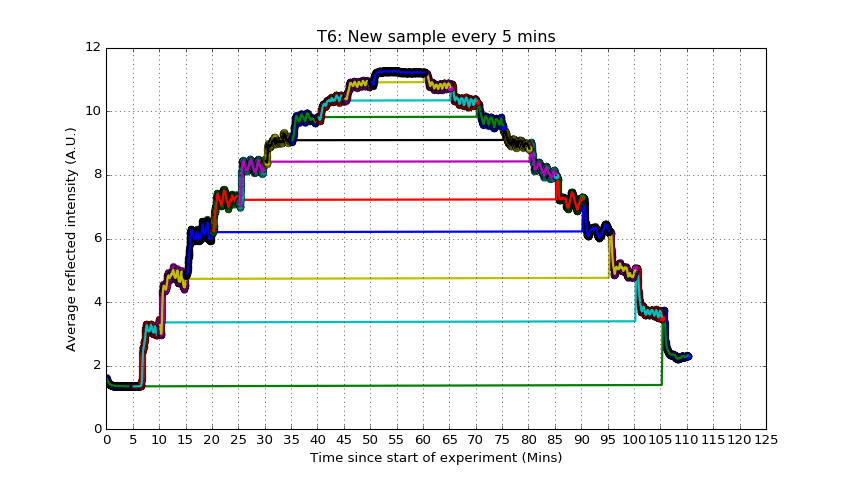

In [39]:
#All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['delta'], group['mean'], 'o', alpha=0.3, label=key)
    rolling = group['mean'].rolling(window=50).mean()
    ax.plot(group['delta'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.xticks(np.arange(0, 2*max(group['delta'])+flush_time, flush_time))
# fig.autofmt_xdate()  # Rotate slightly

# plt.legend(loc='best', ncol=3, fontsize='small')\
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Average reflected intensity (A.U.)')
plt.title('T6: New sample every {:d} mins'.format(flush_time))
plt.savefig('../Data/' + str(folder) + '/wholeExperiment.png', dpi=700)

<IPython.core.display.Javascript object>


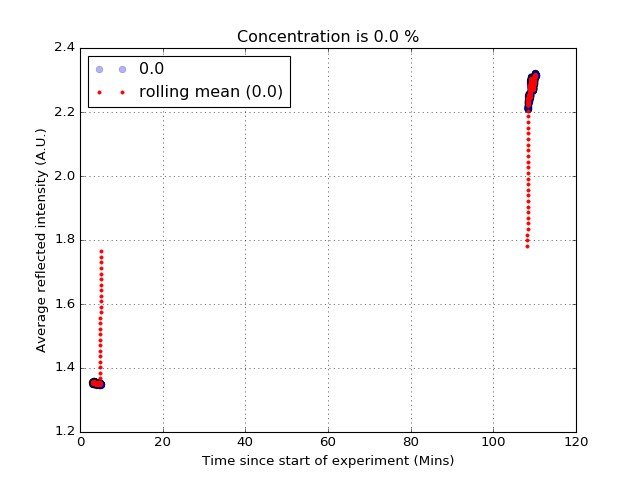

<IPython.core.display.Javascript object>


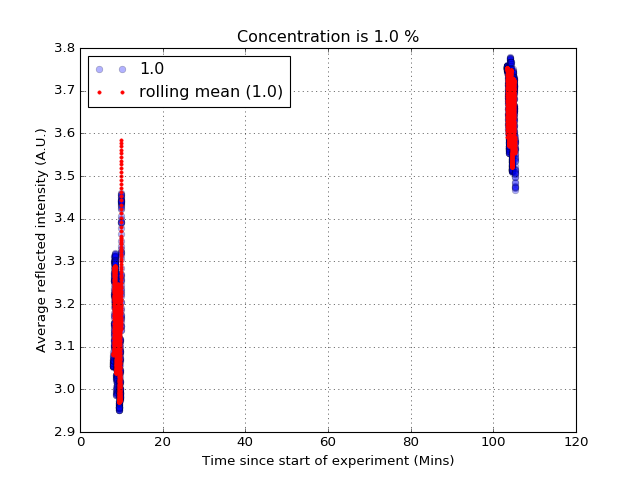

<IPython.core.display.Javascript object>


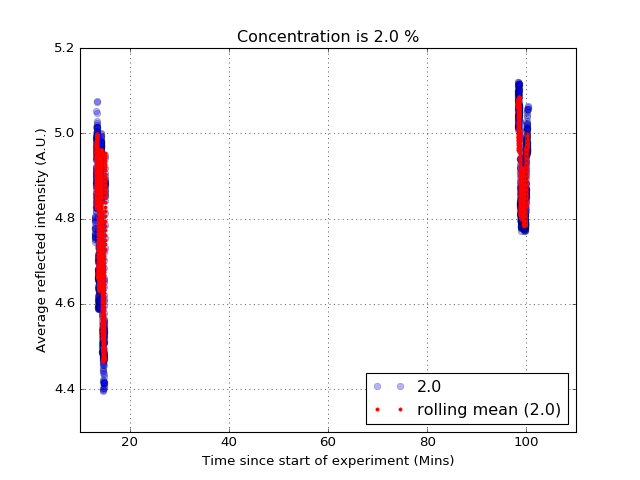

<IPython.core.display.Javascript object>


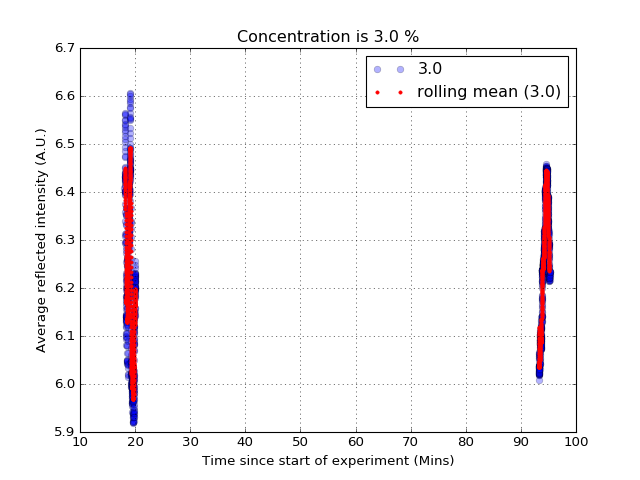

<IPython.core.display.Javascript object>


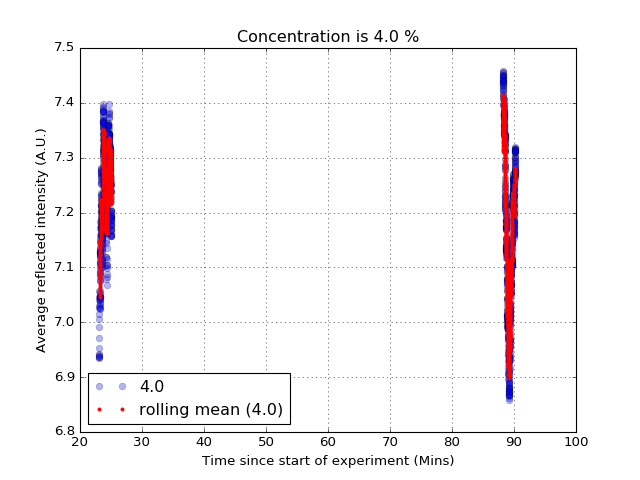

<IPython.core.display.Javascript object>


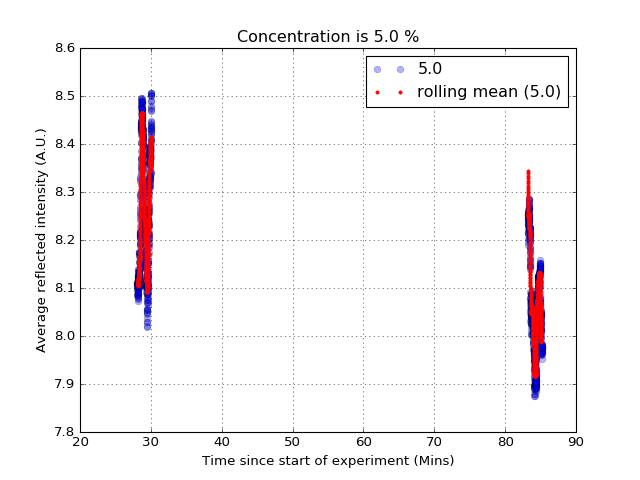

<IPython.core.display.Javascript object>


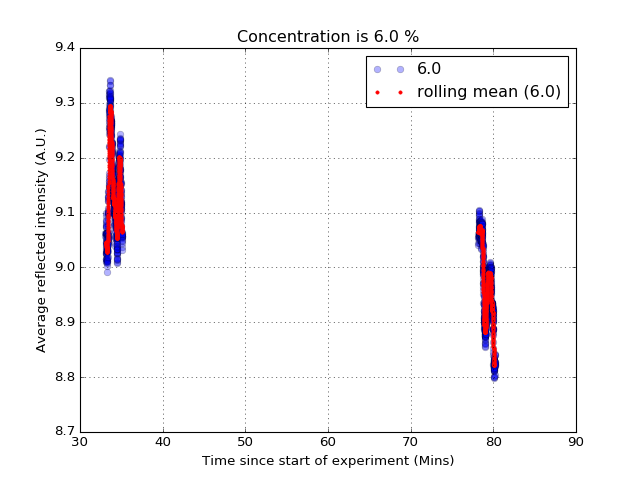

<IPython.core.display.Javascript object>


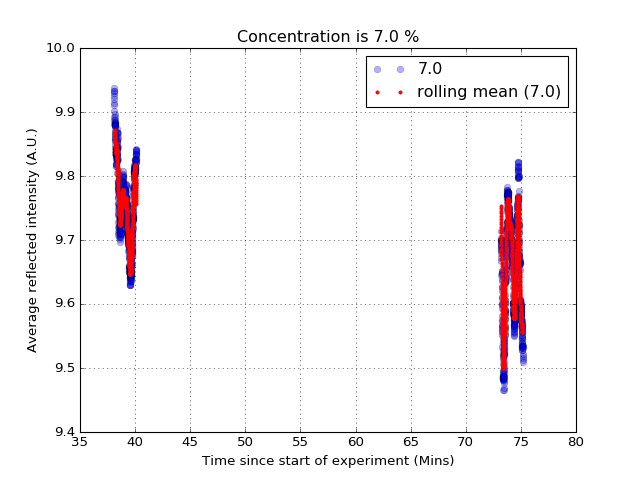

<IPython.core.display.Javascript object>


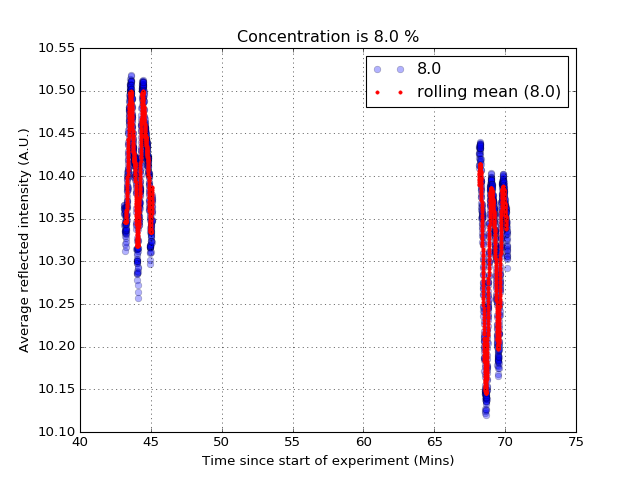

<IPython.core.display.Javascript object>


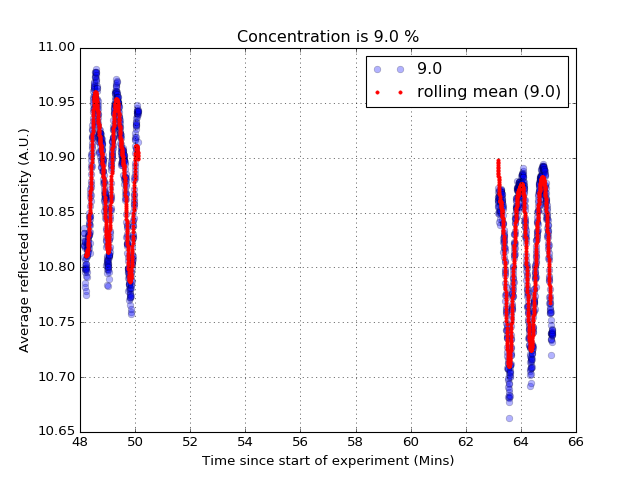

<IPython.core.display.Javascript object>


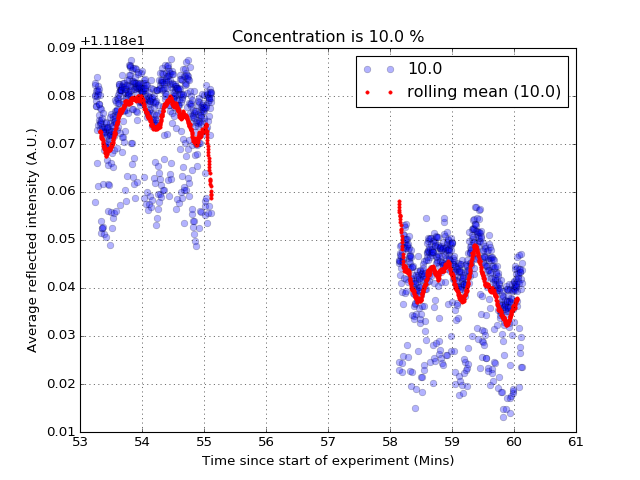

In [46]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.plot(group['delta'], group['mean'], 'o', alpha=0.3, label=key)
    rolling = group['mean'].rolling(window=50, center=True).mean()
    plt.plot(group['delta'], rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Concentration is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Average reflected intensity (A.U.)')
    plt.legend(loc='best')
    plt.savefig('../Data/' + str(folder) + '/' + str(key) + '.png', dpi=500)
#     pass

In [47]:
# Apply mean and std functions to all collumns
g = grouped.agg([np.mean, np.std])

<IPython.core.display.Javascript object>


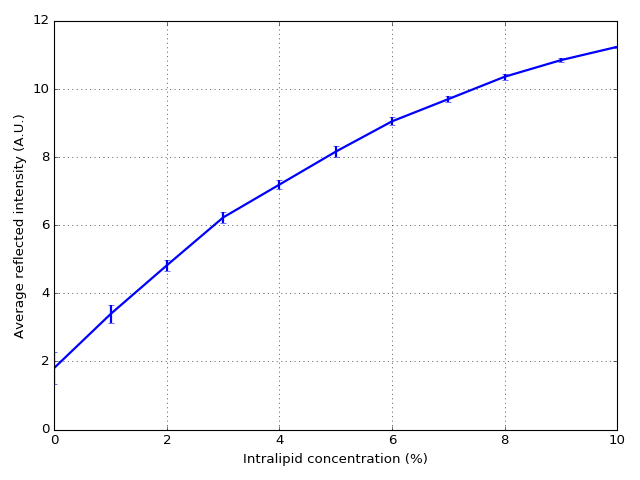

In [48]:
g = g.reset_index()

fig, ax = plt.subplots()

ax.errorbar(g['concentration'], g['mean']['mean'], yerr=g['mean']['std'], color='b', lw='2')

ax.set_xlabel('Intralipid concentration (%)')
ax.set_ylabel('Average reflected intensity (A.U.)')

ax.grid()
# plt.tight_layout()
ax.ticklabel_format(useOffset=False, axis='y')

plt.tight_layout()
# plt.title(df['chip'][0])
plt.savefig('../Data/' + str(folder) + '/IL_reflection.png', dpi=700)